# ContinUNet User Example
-----------------------------
## How to use the Finder class to find sources in a FITS image.

The FITS image is taken from the SKA Science Data Challenge 1 dataset $^{[1]}$ ([SDC1](https://www.skao.int/en/464/ska-science-data-challenge-1)), from the 1.4 GHz 1000 hour image. The `example_image.fits` is a small 512x512 cutout taken from the centre of this image.

In [47]:
import numpy as np

from continunet.finder import Finder

from matplotlib import pyplot as plt
from skimage.measure import find_contours

In [69]:
finder = Finder("continunet/example_image.fits")
sources_default = finder.find(generate_maps=True)
sources_default

Loading FITS image from /Users/bi19158/Code/continunet/continunet/example_image.fits...
Pre-processing image...
Image dimensions cannot be processed by the network, rehsaping image from (512, 512) to (512, 512).
Predicting source segmentation using pre-trained model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
Generating segmentation map...
Using default thresholding method (scikit-image triangle threshold).
Labelling sources...
Calculating source properties...
Correcting source catalogue...
ContinUNet found 1400 sources in 3.11 seconds.


,y_location_cutout,x_location_cutout,orientation,major_axis,minor_axis,flux_density_uncorrected,label,x_location,y_location,right_acsension,declination,area,position_angle,correction_factor,flux_density
0,1.125000,54.125000,1.463117,4.683927,2.358141,8.882924e-08,1,54.125000,1.125000,0.015576,-30.017044,8.675006,173.830456,3.600886,3.198640e-07
1,3.782609,77.228261,1.515013,25.065565,6.740327,6.538761e-08,2,77.228261,3.782609,0.013784,-30.016866,132.693109,176.803832,1.475657,9.648969e-08
5,1.800000,23.600000,0.321751,3.098387,1.788854,4.576242e-08,6,23.600000,1.800000,0.017942,-30.016998,4.353118,108.434949,4.488639,2.054110e-07
6,7.666667,36.022222,-0.297612,12.195093,6.330230,1.115624e-07,7,36.022222,7.666667,0.016979,-30.016605,60.630967,72.948105,1.191277,1.329017e-07
7,1.250000,42.000000,1.570796,2.828427,1.732051,1.633555e-08,8,42.000000,1.250000,0.016516,-30.017035,3.847649,180.000000,11.635788,1.900770e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,508.923077,96.076923,1.468406,5.779165,2.873684,2.174790e-07,3234,96.076923,508.923077,0.012318,-29.982951,13.043495,174.133458,2.279139,4.956649e-07
3237,509.166667,339.500000,0.832874,4.811792,2.098145,3.419271e-08,3238,339.500000,509.166667,359.993450,-29.982935,7.929252,137.720166,3.396527,1.161365e-07
3238,509.571429,454.142857,-1.363543,5.056836,2.781102,8.266491e-08,3239,454.142857,509.571429,359.984564,-29.982908,11.045509,11.874747,5.342107,4.416048e-07
3240,509.333333,39.333333,-0.785398,2.309401,1.333333,2.620701e-08,3241,39.333333,509.333333,0.016717,-29.982923,2.418399,45.000000,5.364143,1.405782e-07


In [70]:
image = finder.image_object.data
model_map = finder.model_map
residuals = finder.residuals
segmentation_map = finder.segmentation_map

Text(0.5, 1.0, 'Residuals')

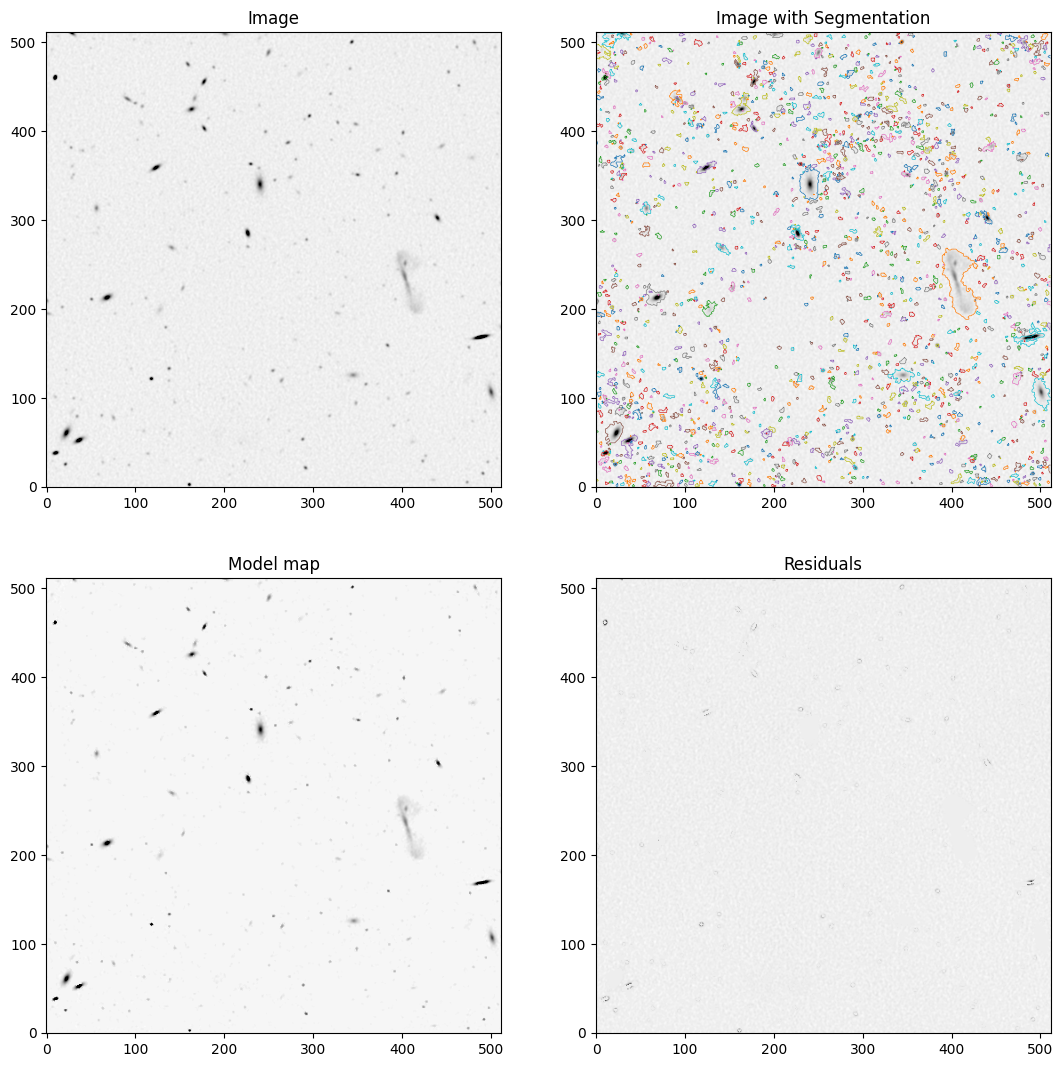

In [71]:
contours = find_contours(segmentation_map, 0.5)
# plot image, segmentation map, model map, residuals
fig, ax = plt.subplots(2, 2, figsize=(13, 13))

ax[0, 0].imshow(image, vmax=5e-6, origin="lower", cmap="gray_r")
ax[0, 0].set_title("Image")

ax[0, 1].imshow(image, vmax=5e-6, origin="lower", cmap="gray_r")

for contour in contours:
    ax[0, 1].plot(contour[:, 1], contour[:, 0], linewidth=0.5)
ax[0, 1].set_title("Image with Segmentation")

ax[1, 0].imshow(model_map, vmax=5e-6, origin="lower", cmap="gray_r")
ax[1, 0].set_title("Model map")

ax[1, 1].imshow(residuals, vmax=5e-6, origin="lower", cmap="gray_r")
ax[1, 1].set_title("Residuals")


## Using a different threshold
ContinUNet uses the [Triangle threshold](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_triangle) by default, which returns a threshold based on the Triangle algorithm $^{[2]}$. The [Otsu threshold](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu) is also available and can be configured by setting `threshold="otsu"` in the `Finder.find` method. The Otsu threshold returns the threshold value based on Otsu's method $^{[3]}$.

A threshold float value can also be given as `threshold=0.2` for example. It is recommended to use either the default threshold or Otsu depending on your requirements. Where the threshold is set will affect what is present in the segmentation map and thus the sources extracted. A higher threshold value will detect fewer spurious sources, but a lower threshold may connect more extended emission. Please use the threshold suitable for your data.


In [72]:
sources_otsu = finder.find(generate_maps=True, threshold="otsu")
sources_otsu

Loading FITS image from /Users/bi19158/Code/continunet/continunet/example_image.fits...
Pre-processing image...
Image dimensions cannot be processed by the network, rehsaping image from (512, 512) to (512, 512).
Predicting source segmentation using pre-trained model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
Generating segmentation map...
Using Otsu thresholding method.
Labelling sources...
Calculating source properties...
Correcting source catalogue...
ContinUNet found 484 sources in 1.53 seconds.


,y_location_cutout,x_location_cutout,orientation,major_axis,minor_axis,flux_density_uncorrected,label,x_location,y_location,right_acsension,declination,area,position_angle,correction_factor,flux_density
3,2.285714,161.000000,1.570796,3.023716,2.799417,4.853233e-06,4,161.000000,2.285714,0.007289,-30.016967,6.648113,180.000000,5.186056,2.516914e-05
8,3.500000,172.000000,-1.017222,3.236068,1.236068,3.475115e-08,9,172.000000,3.500000,0.006436,-30.016885,3.141593,31.717474,3.194373,1.110081e-07
10,4.818182,473.818182,-0.785398,3.813850,3.672547,1.707088e-06,11,473.818182,4.818182,359.983033,-30.016796,11.000715,45.000000,1.394459,2.380465e-06
27,7.750000,435.666667,1.225128,4.167620,3.631322,7.711491e-07,28,435.666667,7.750000,359.985991,-30.016599,11.886192,160.194656,1.246249,9.610439e-07
29,9.000000,36.000000,-0.785398,3.703280,2.138090,1.040286e-07,30,36.000000,9.000000,0.016981,-30.016515,6.218741,45.000000,1.763549,1.834594e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,507.285714,505.000000,1.570796,3.023716,2.799417,9.863229e-08,1238,505.000000,507.285714,359.980622,-29.983060,6.648113,180.000000,1.993973,1.966701e-07
1238,509.312500,29.875000,-1.084162,10.278151,2.355233,8.730775e-06,1239,29.875000,509.312500,0.017450,-29.982925,19.012476,27.882090,3.801885,3.319341e-05
1240,508.363636,247.090909,0.263033,4.346130,3.067356,4.694961e-07,1241,247.090909,508.363636,0.000613,-29.982989,10.470244,105.070693,1.475454,6.927198e-07
1244,508.500000,96.500000,-0.785398,2.000000,2.000000,7.017900e-08,1245,96.500000,508.500000,0.012286,-29.982980,3.141593,45.000000,3.105704,2.179552e-07


In [73]:
image = finder.image_object.data
model_map = finder.model_map
residuals = finder.residuals
segmentation_map = finder.segmentation_map

Text(0.5, 1.0, 'Residuals')

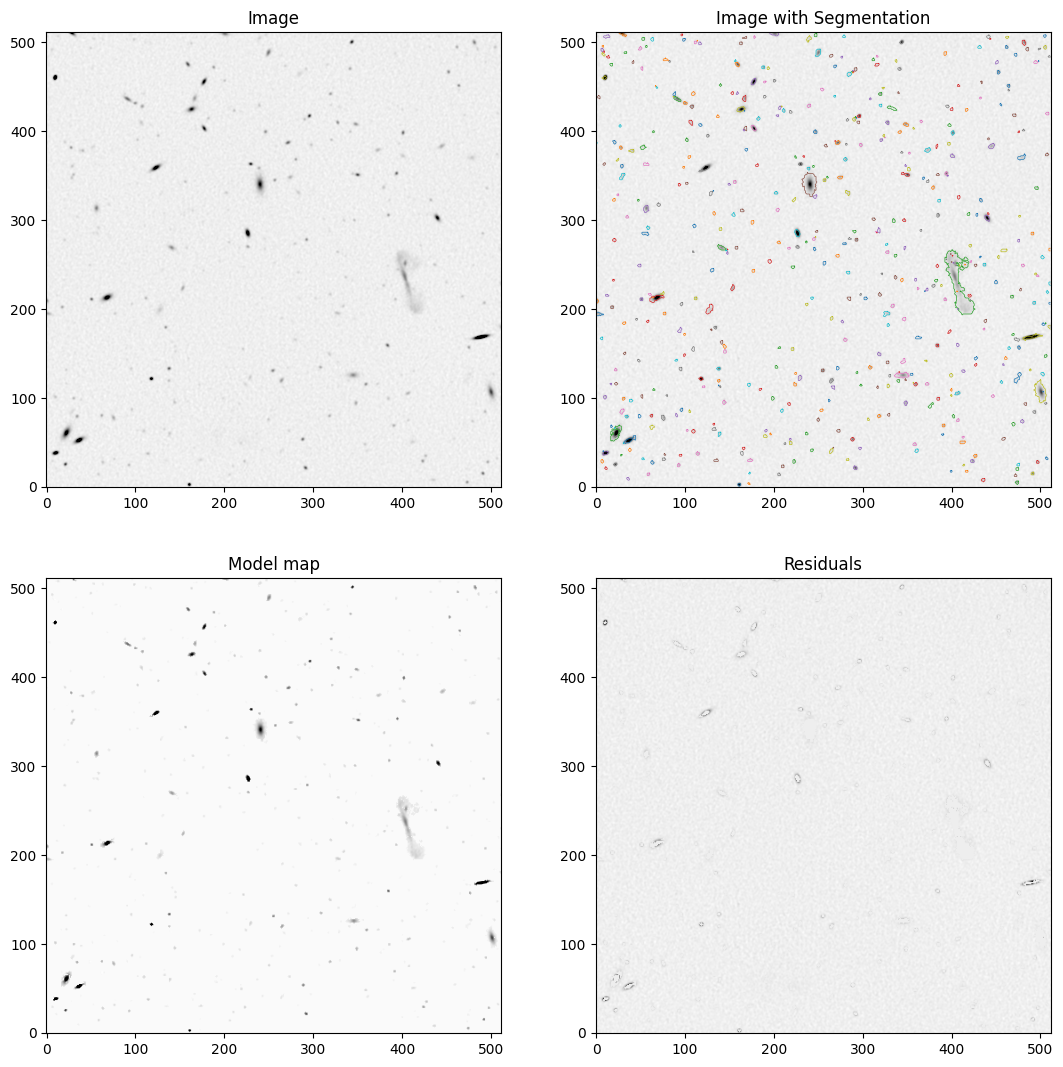

In [74]:
contours = find_contours(segmentation_map, 0.5)
# plot image, segmentation map, model map, residuals
fig, ax = plt.subplots(2, 2, figsize=(13, 13))

ax[0, 0].imshow(image, vmax=5e-6, origin="lower", cmap="gray_r")
ax[0, 0].set_title("Image")

ax[0, 1].imshow(image, vmax=5e-6, origin="lower", cmap="gray_r")

for contour in contours:
    ax[0, 1].plot(contour[:, 1], contour[:, 0], linewidth=0.5)
ax[0, 1].set_title("Image with Segmentation")

ax[1, 0].imshow(model_map, vmax=5e-6, origin="lower", cmap="gray_r")
ax[1, 0].set_title("Model map")

ax[1, 1].imshow(residuals, vmax=5e-6, origin="lower", cmap="gray_r")
ax[1, 1].set_title("Residuals")

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/66/cg8gg6pd6lgf7q8wnkw9w_prrsjx1x/T/ipykernel_62344/4180515175.py:5: SyntaxWarning: invalid escape sequence '\s'
  ax.axvline(5 * 73e-9, color="gray", linestyle="--", label="5$\sigma$ detection limit")


Text(0.5, 1.0, 'Flux density distribution of detected sources')

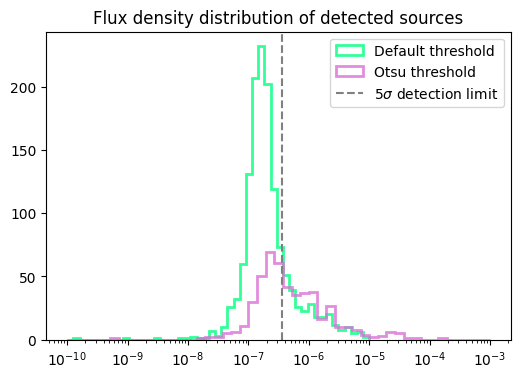

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.hist(sources_default.flux_density, bins=np.logspace(-10, -5, 50), histtype="step", color="springgreen", linewidth=2, alpha=0.8, label="Default threshold")
ax.hist(sources_otsu.flux_density, bins=np.logspace(-10, -3, 50), histtype="step", color="orchid", linewidth=2, alpha=0.8, label="Otsu threshold")
ax.axvline(5 * 73e-9, color="gray", linestyle="--", label="5$\sigma$ detection limit")
ax.set_xscale("log")
ax.legend()
ax.set_title("Flux density distribution of detected sources")


## References

[1] Bonaldi A., Braun R., 2018, [preprint](arXiv:1811.10454)

[2] Zack G. W., Rogers W. E., Latt S. A., 1977, J. [Histochem. Cytochem.](http://dx.doi.org/10.1177/25.7.704544), 25, 741

[3] Otsu N., 1979, [IEEE Trans. Syst. Man Cybern.](http://dx.doi.org/10.1109/TSMC.1979.4310076), SMC-9, 62